# Sentimental Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os
import time
import random
import folium
from IPython.display import display
import tempfile
from folium.plugins import HeatMap

## Read Dataset

In [2]:
df = pd.read_csv('/Users/gaotian/Desktop/cs506-final-project/data/reviews_join_listings_translated.csv')

In [3]:
df.head()

,id,name,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date,reviewer_id,reviewer_name,comments,SentimentValue
0,3781,HARBORSIDE-Walk to subway,East Boston,42.36524,-71.02936,Entire home/apt,125,15,0.29,2,141,2015-07-10,36059247.0,Greg,The apartment was as advertised and Frank was ...,0.8070
1,3781,HARBORSIDE-Walk to subway,East Boston,42.36524,-71.02936,Entire home/apt,125,15,0.29,2,141,2015-08-09,10459388.0,Tai,It was a pleasure to stay at Frank's place. Th...,0.5719
2,3781,HARBORSIDE-Walk to subway,East Boston,42.36524,-71.02936,Entire home/apt,125,15,0.29,2,141,2015-09-01,12264652.0,Damien,The apartment description is entirely faithful...,0.9557
3,3781,HARBORSIDE-Walk to subway,East Boston,42.36524,-71.02936,Entire home/apt,125,15,0.29,2,141,2015-09-30,41426327.0,Mike,Thoroughly enjoyed my time at Frank's home. Ha...,0.9780
4,3781,HARBORSIDE-Walk to subway,East Boston,42.36524,-71.02936,Entire home/apt,125,15,0.29,2,141,2015-10-30,15151513.0,Ivan,Great value for the money! This location has e...,0.5578


In [4]:
df.isnull().sum()

id                                   0
name                                55
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
number_of_reviews                    0
reviews_per_month                  995
calculated_host_listings_count       0
availability_365                     0
date                               995
reviewer_id                        995
reviewer_name                      997
comments                          1133
SentimentValue                       0
dtype: int64

In [5]:
df.fillna({'name':'Unknown'}, inplace=True)

In [6]:
df.isnull().sum()

id                                   0
name                                 0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
number_of_reviews                    0
reviews_per_month                  995
calculated_host_listings_count       0
availability_365                     0
date                               995
reviewer_id                        995
reviewer_name                      997
comments                          1133
SentimentValue                       0
dtype: int64

In [7]:
# Statistic information
df.describe()

,id,latitude,longitude,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,reviewer_id,SentimentValue
count,2.183190e+05,218319.000000,218319.000000,218319.000000,218319.000000,217324.000000,218319.000000,218319.000000,2.173240e+05,218319.000000
mean,1.442110e+07,42.339527,-71.077658,159.095974,149.175028,4.079556,13.925719,155.718746,8.502107e+07,0.799374
std,9.496217e+06,0.027398,0.032911,141.328797,124.222342,2.578120,40.701336,124.011095,7.352819e+07,0.275353
min,3.781000e+03,42.235760,-71.172950,0.000000,0.000000,0.010000,1.000000,0.000000,1.000000e+00,-0.997500
25%,5.967421e+06,42.320760,-71.097960,80.000000,58.000000,2.190000,1.000000,42.000000,2.342491e+07,0.765000
50%,1.495038e+07,42.344830,-71.069820,125.000000,116.000000,3.630000,3.000000,134.000000,6.260026e+07,0.902000
75%,2.132036e+07,42.359790,-71.055640,195.000000,203.000000,5.520000,7.000000,284.000000,1.339662e+08,0.956500
max,3.879644e+07,42.398350,-70.969630,10000.000000,679.000000,12.640000,240.000000,365.000000,2.961386e+08,0.999400


## Sentimental Analysis

In [8]:
# Sentimental analysis on each translated comments and save the result

sentiment_score = []
analyzer = SentimentIntensityAnalyzer()
for index, row in df.iterrows(): 
    vs = analyzer.polarity_scores(str(row['comments']))
    sentiment_score.append(vs['compound'])
    # print progress
    if index % 10000 == 0:
        print(index)
df['SentimentValue'] = sentiment_score

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000


In [9]:
df.head()

,id,name,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,date,reviewer_id,reviewer_name,comments,SentimentValue
0,3781,HARBORSIDE-Walk to subway,East Boston,42.36524,-71.02936,Entire home/apt,125,15,0.29,2,141,2015-07-10,36059247.0,Greg,The apartment was as advertised and Frank was ...,0.8070
1,3781,HARBORSIDE-Walk to subway,East Boston,42.36524,-71.02936,Entire home/apt,125,15,0.29,2,141,2015-08-09,10459388.0,Tai,It was a pleasure to stay at Frank's place. Th...,0.5719
2,3781,HARBORSIDE-Walk to subway,East Boston,42.36524,-71.02936,Entire home/apt,125,15,0.29,2,141,2015-09-01,12264652.0,Damien,The apartment description is entirely faithful...,0.9557
3,3781,HARBORSIDE-Walk to subway,East Boston,42.36524,-71.02936,Entire home/apt,125,15,0.29,2,141,2015-09-30,41426327.0,Mike,Thoroughly enjoyed my time at Frank's home. Ha...,0.9780
4,3781,HARBORSIDE-Walk to subway,East Boston,42.36524,-71.02936,Entire home/apt,125,15,0.29,2,141,2015-10-30,15151513.0,Ivan,Great value for the money! This location has e...,0.5578


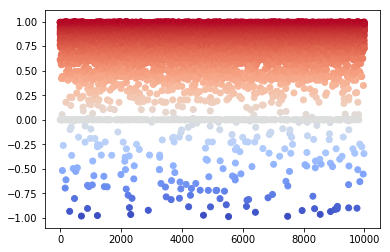

In [10]:
# Draw scatter plot of sentimental value
sample = []
sampleNum = random.sample(range(len(df['SentimentValue'])), 10000)
for i in sampleNum:
    sample.append(df.loc[i]['SentimentValue'])
x = range(len(sample))
plt.scatter(x, sample, c=sample, cmap='coolwarm', alpha=1)
plt.show()

## Visualization

In [11]:
# Create a map for folium use
map = {}
for item in df.iterrows():
    map[item[1]['id']] = ['', '', 0, 0, 0, 0]

In [12]:
global str
for index, row in df.iterrows(): 
    map[row['id']][0] = str(row['name']) + '\n' + 'price: $' + str(row['price']) + '\n'
    map[row['id']][1] = row['neighbourhood']
    map[row['id']][2] = row['latitude']
    map[row['id']][3] = row['longitude']

In [13]:
df = pd.DataFrame(df.groupby('id').mean()['SentimentValue'])
for item in df.iterrows():
    map[item[0]][0] += 'mean: ' + str(round(float(item[1]), 4)) + "\n"

In [14]:
df = pd.DataFrame(df.groupby('id').min()['SentimentValue'])
for item in df.iterrows():
    map[item[0]][0] += 'min: ' + str(round(float(item[1]), 4)) + "\n"

In [15]:
df = pd.DataFrame(df.groupby('id').max()['SentimentValue'])
for item in df.iterrows():
    map[item[0]][0] += 'max: ' + str(round(float(item[1]), 4)) + "\n"

In [16]:
df = pd.DataFrame(df.groupby('id').mean()['SentimentValue'])
for item in df.iterrows():
    map[item[0]][4] = float(item[1])

In [17]:
df = pd.DataFrame(df.groupby('id').size())
for item in df.iterrows():
    map[item[0]][0] += 'total: ' + str(int(item[1]))

In [18]:
for item in map.values():
    item[0] = item[0].replace('\n', '<br>')

In [19]:
# Check map
map

{3781: ['HARBORSIDE-Walk to subway<br>price: $125<br>mean: 0.8614<br>min: 0.8614<br>max: 0.8614<br>total: 1',
  'East Boston',
  42.36524,
  -71.02936,
  0.8613933333333333,
  0],
 6976: ['Mexican Folk Art Showcase in Boston Neighborhood<br>price: $65<br>mean: 0.9184<br>min: 0.9184<br>max: 0.9184<br>total: 1',
  'Roslindale',
  42.29244,
  -71.13577,
  0.9183719512195122,
  0],
 8789: ['Curved Glass Studio/1bd facing Park<br>price: $99<br>mean: 0.8352<br>min: 0.8352<br>max: 0.8352<br>total: 1',
  'Downtown',
  42.35919000000001,
  -71.06265,
  0.8352434782608695,
  0],
 9273: ['Stay at "HARBORVIEW" Walk to subway<br>price: $225<br>mean: 0.8729<br>min: 0.8729<br>max: 0.8729<br>total: 1',
  'East Boston',
  42.36461,
  -71.02901999999997,
  0.8729357142857145,
  0],
 10730: ['Bright 1bed facing Golden Dome<br>price: $150<br>mean: 0.9097<br>min: 0.9097<br>max: 0.9097<br>total: 1',
  'Downtown',
  42.3584,
  -71.06185,
  0.9097033333333334,
  0],
 10811: ['Back Bay Studio on Marlborough St

In [26]:
# create heatmap
heat_map = folium.Map(location=[42.339, -71.078])
# create sentiment map
sentiment_map = folium.Map(location=[42.339, -71.078])

FG1 = folium.FeatureGroup(name='0~25%')
FG2 = folium.FeatureGroup(name='25~50%')
FG3 = folium.FeatureGroup(name='50~75%')
FG4 = folium.FeatureGroup(name='75~100%')
heatmapFG = folium.FeatureGroup(name='Heat Map')
coordinates = []
count = 0
for item in map.values():
    coordinates.append((item[2], item[3]))
    if item[4] < 0.765:
        color = 'red'
        icon = ''
        featureGroup = FG1
    elif item[4] < 0.902 :
        color = 'orange'
        icon = ''
        featureGroup = FG2
    elif item[4] < 0.9565 :
        color = 'green'
        icon = ''
        featureGroup = FG3
    else:
        color = 'blue'
        icon = ''
        featureGroup = FG4
    folium.Marker(
        location=[item[2], item[3]],
        popup=folium.Popup(item[0], max_width=100),
        icon=folium.Icon(color=color, icon=icon)
    ).add_to(featureGroup)
    count += 1
    if count > 300:
        break

HeatMap(coordinates).add_to(heatmapFG)
# heat_map.save('heat_map.html')

FG1.add_to(sentiment_map)
FG2.add_to(sentiment_map)
FG3.add_to(sentiment_map)
FG4.add_to(sentiment_map)
heatmapFG.add_to(sentiment_map)
folium.LayerControl().add_to(sentiment_map)
sentiment_map.save('../result/sentiment_map.html')

tmp = tempfile.NamedTemporaryFile()
sentiment_map.save(tmp.name)

In [27]:
# create neighborhood map
neighborhood_map = folium.Map(location=[42.339, -71.078])

neighborhoods = ['East Boston', 'Roslindale', 'Downtown', 'Back Bay', 'North End',
       'Dorchester', 'South End', 'Jamaica Plain', 'Charlestown',
       'Fenway', 'Roxbury', 'Mission Hill', 'Beacon Hill', 'Allston',
       'West Roxbury', 'South Boston', 'Brighton',
       'South Boston Waterfront', 'West End', 'Chinatown', 'Mattapan',
       'Bay Village', 'Hyde Park', 'Longwood Medical Area',
       'Leather District', 'Harbor Islands']

groups = []
for n in neighborhoods:
    groups.append(folium.FeatureGroup(name=n))
    
count = 0
for item in map.values():
    featureGroup = groups[neighborhoods.index(item[1])]
    if item[4] < 0.765:
        color = 'red'
        icon = ''
    elif item[4] < 0.902:
        color = 'orange'
        icon = ''
    elif item[4] < 0.9565:
        color = 'green'
        icon = ''
    else:
        color = 'blue'
        icon = ''
    folium.Marker(
        location=[item[2], item[3]],
        popup=folium.Popup(item[0], max_width=100),
        icon=folium.Icon(color=color, icon=icon)
    ).add_to(featureGroup)
    count += 1
    if count > 300:
        break

for g in groups:
    g.add_to(neighborhood_map)

folium.LayerControl().add_to(neighborhood_map)
neighborhood_map.save('../result/neighborhood_map.html')

tmp = tempfile.NamedTemporaryFile()
neighborhood_map.save(tmp.name)

In [22]:
# Save map information
np.save('map.npy', map) 